In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect 
from googletrans import Translator

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

##### Importing all scraped files

In [2]:
df_1 = pd.read_csv(r'raw scraped data\product_AnalogCameras_page1.csv')
df_2 = pd.read_csv(r'raw scraped data\product_androidTab_page1.csv')
df_3 = pd.read_csv(r'raw scraped data\product_androidTab_page2.csv')
df_4 = pd.read_csv(r'raw scraped data\product_CameraLenses_page1.csv')
df_5 = pd.read_csv(r'raw scraped data\product_cameras_page1.csv')
df_6 = pd.read_csv(r'raw scraped data\product_cameras_page7.csv')
df_7 = pd.read_csv(r'raw scraped data\product_headphones_page1.csv')
df_8 = pd.read_csv(r'raw scraped data\product_headphones_page11.csv')
df_9 = pd.read_csv(r'raw scraped data\product_iphone_page1.csv')
df_10 = pd.read_csv(r'raw scraped data\product_laptops_page1.csv')
df_11 = pd.read_csv(r'raw scraped data\product_phones_page1.csv')
df_12 = pd.read_csv(r'raw scraped data\product_phones_page13.csv')
df_13 = pd.read_csv(r'raw scraped data\product_phones_page4.csv')

In [3]:
df_1['item']='camera'
df_2['item']='tab'
df_3['item']='tab'
df_4['item']='camera lens'
df_5['item']='camera'
df_6['item']='camera'
df_7['item']='headphone'
df_8['item']='headphone'
df_9['item']='mobile phone'
df_10['item']='laptop'
df_11['item']='mobile phone'
df_12['item']='mobile phone'
df_13['item']='mobile phone'

In [4]:
df = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13],axis=0,ignore_index=True)

In [5]:
df['Title'].duplicated().sum()

518

* Filtering the duplicates on Title and Prices Together as they are uniques for any product

In [ ]:
df.drop_duplicates(subset=['Title','Price'],inplace-True)

#### For a single product , Reviews are a string. All the reviews are concatenated using semicolon(';')

In [9]:
def split_reviews(x):
    if isinstance(x, str):
        return x.split(';')
    else:
        return []

In [10]:
df['Reviews'] = df['Reviews'].apply(split_reviews)

The row removes because of this error "Error detecting or translating language: the JSON object must be str, bytes or bytearray, not NoneType"

### Function for decontraction of words

In [11]:
def decontraction(review):
    new_review = []
    for q in review:
        # https://stackoverflow.com/a/19794953
        contractions = { 
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
        }
        q = q.replace("'ve", " have ")
        q = q.replace("n't", " not ")
        q = q.replace("'re", " are ")
        q = q.replace("'ll", " will ")
    
        q_decontracted = []
        
        for word in q.split():
            if word in contractions:
                word = contractions[word]
        
            q_decontracted.append(word)
        q = ' '.join(q_decontracted)
        new_review.append(q)
    return new_review

In [12]:
df['Reviews'] = df['Reviews'].apply(decontraction)

## Preprocess function handles:
* emoji removal
* html tag removal
* Special charachter removal, and some regex substitutions

In [13]:
def preprocess(review):
    preprocessed_review = []
    for q in review: 
        emoji_pattern = re.compile(
            "[" 
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "\U00002702-\U000027B0"  # dingbats
            "\U000024C2-\U0001F251" 
            "]+", 
            flags=re.UNICODE
        )
        q = emoji_pattern.sub(r'', q)
        pattern = re.compile("[^\w\s]|\d|_")
        q = pattern.sub("", q)
        q = str(q).lower().strip()
        
        q = q.replace('%', ' percent')
        q = q.replace('$', ' dollar ')
        q = q.replace('₹', ' rupee ')
        q = q.replace('€', ' euro ')
        q = q.replace('@', ' at ')
        
        q = q.replace(',000,000,000 ', 'b ')
        q = q.replace(',000,000 ', 'm ')
        q = q.replace(',000 ', 'k ')
        q = re.sub(r'([0-9]+)000000000', r'\1b', q)
        q = re.sub(r'([0-9]+)000000', r'\1m', q)
        q = re.sub(r'([0-9]+)000', r'\1k', q)
        
        q = BeautifulSoup(q,'lxml')
        q = q.get_text()
        
        # Remove punctuation
        pattern = re.compile('\W')  
        q = re.sub(pattern, ' ', q).strip()
        q = q.replace('\n', '').replace('-', '')

        if len(q.strip()) != 0:
            preprocessed_review.append(q)
    return preprocessed_review

In [14]:
df['Reviews'] = df['Reviews'].apply(preprocess)

### Language translation for some reviews

In [15]:
from langdetect import LangDetectException

def translator(review):
    translated_review = []
    translator = Translator()
    for q in review:
        try:
            if q.strip():
                detected_language = detect(q)
                if detected_language != 'en':
                    # Translate non-English text to English
                    translated = translator.translate(q, src=detected_language, dest='en')
                    q = translated.text
                translated_review.append(q)
        except LangDetectException as e:
            print(f"Language detection error for row {row}: {e}")
        except Exception as e:
            print(f"Error translating text in row {row}: {e}")
    return translated_review            

#### All reviews analysis
* on translation of extremely long text , it throws an error "Error detecting or translating language: the JSON object must be str, bytes or bytearray, not NoneType".
##### Following is a analysis on the lengths of these words, that i found, was a major reason for this error (from stackoverflow) 

In [16]:
all_reviews = []
for l in df['Reviews']:
    for review in l:
        all_reviews.append(len(review))

Text(0, 0.5, 'sentence length')

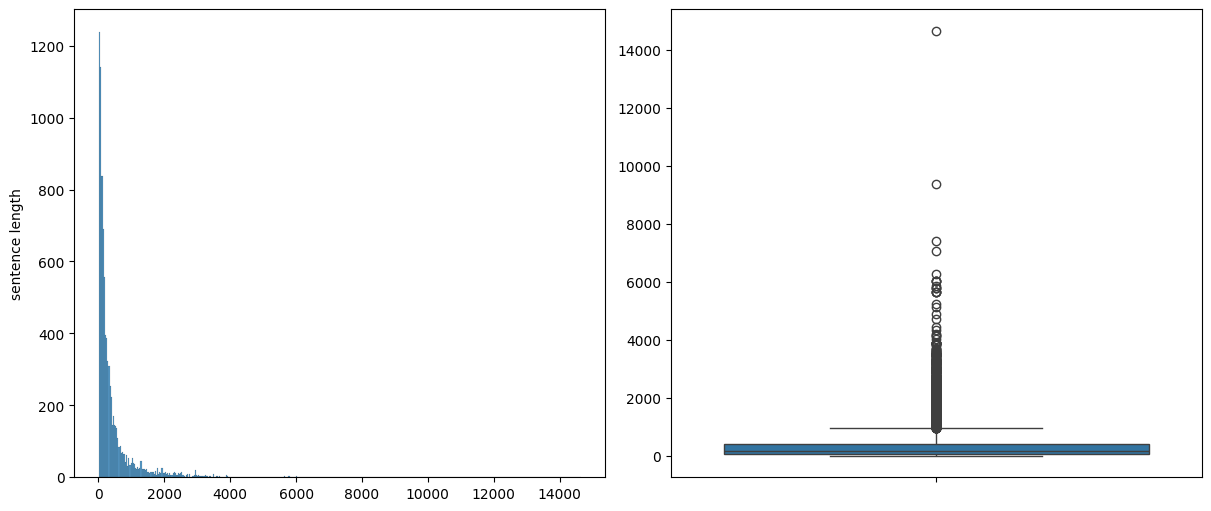

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (12,5),constrained_layout=True)
sns.histplot(all_reviews,ax=axes[0])
sns.boxplot(all_reviews,ax=axes[1])
axes[0].set_ylabel('sentence length')

###### Filtering the reviews on the basis of review longths
* through a regressive search , threshold of 4000 is decided

In [18]:
for reviews in df['Reviews']:
    for review in reviews:
        if len(review) >4000:
            reviews.remove(review)

In [19]:
all_reviews = []
for l in df['Reviews']:
    for review in l:
        all_reviews.append(len(review))

Text(0, 0.5, 'sentence length')

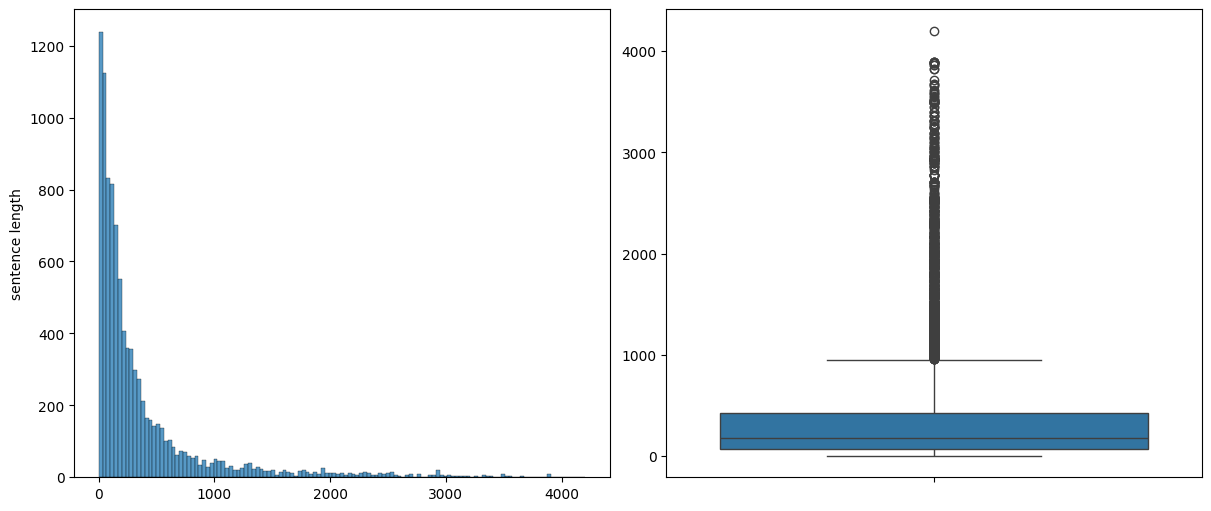

In [20]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (12,5),constrained_layout=True)
sns.histplot(all_reviews,ax=axes[0])
sns.boxplot(all_reviews,ax=axes[1])
axes[0].set_ylabel('sentence length')

#### Running the traslator function

In [21]:
df['Reviews'] = df['Reviews'].apply(translator)
df['Price'] = df['Price'].apply(lambda x: int(x.replace(',','')))

# Classification of the Reviews

##### Importing the models and objects from the lstm classification notebook

In [22]:
import pickle

# Load the LSTM model from a pickle file
with open('lstm_model.pkl', 'rb') as file:
    lstm_model = pickle.load(file)
    
# The already fit tokenizer object
with open('tokenizer.pkl', 'rb') as file:
    tokenizer = pickle.load(file)

### lstm_model and the tokenizer object were trained on snowball stemmed and stopword removed data, so for the best results it is necessary to follow here

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stop_words = stopwords.words('english')
exclude_words = ["not", "wouldn", "hadn't", "wouldn't", "no", "isn", "mightn't", "doesn't",
                 "haven't", "won't", "needn't", "weren't", "didn't", "shouldn't",
                 "wasn't", "don't", "aren't", "couldn't", "mustn't", "shan't"]
for word in exclude_words:
    stop_words.remove(word)

stemmer = SnowballStemmer(language='english')

In [24]:
def classify_reviews(reviews, tokenizer, model, max_len, stemmer, stop_words):
    positive_reviews = []
    critical_reviews = []
    
    for review in reviews:
        # the tokenizer and lstm model was trained on snowball stemmed and 
        new_review = [stemmer.stem(word) for word in review.split() if word not in stop_words]
        new_review = ' '.join(new_review) 
        
        # Tokenize and pad the review
        sequence = tokenizer.texts_to_sequences([new_review])
        padded = pad_sequences(sequence, maxlen=max_len, padding='post')
        
        prediction = model.predict(padded)
        
        if prediction >= 0.5:
            positive_reviews.append(review)
        else:
            critical_reviews.append(review)
    
    return positive_reviews, critical_reviews

# Define max_len ,it will be the same as used during training
max_len = 100 

positive_feedback = []
critical_feedback = []

for reviews in df['Reviews']:
    positive, critical = classify_reviews(reviews, tokenizer, lstm_model, max_len, stemmer, stop_words)
    positive_feedback.append(positive)
    critical_feedback.append(critical)

df['positive_feedback'] = positive_feedback
df['critical_feedback'] = critical_feedback

df = df.drop(columns=['Reviews'])

1/1 [==============================] - 0s 172ms/step


# TF-IDF Vctorizor model for Tag extraction

In [26]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
Stopwords = stopwords.words('english') # defining again as the previously defined list has some words omitted

def lemmatize_feedback(feedback): # pandas series coming as the input
    lemmatized_feedback = []
    for review in feedback:
        lemmatized_review = [lemmatizer.lemmatize(word) for word in review.lower().split() if word not in stop_words]
        lemmatized_review = ' '.join(lemmatized_review) 
        lemmatized_feedback.append(lemmatized_review)
    return lemmatized_feedback


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arins\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
df['positive_feedback_lemmatized'] = df['positive_feedback'].apply(lemmatize_feedback)
df['critical_feedback_lemmatized'] = df['critical_feedback'].apply(lemmatize_feedback)

#### Try to extract unique words from reviews to form tags

In [28]:
temp = df.copy()

In [29]:
temp.columns

Index(['Title', 'Price', 'Link', 'Image URL', 'Description', 'item',
       'positive_feedback', 'critical_feedback',
       'positive_feedback_lemmatized', 'critical_feedback_lemmatized'],
      dtype='object')

### Extracting Adjectives

In [30]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize


def word_tokenizer_(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

# Function to extract adjectives and nouns using POS tagging
def extract_words(tokens):
    tagged_tokens = pos_tag(tokens)
    words = [word for word, tag in tagged_tokens if tag.startswith('JJ')]
    # filtered teh non trranslated text here
    return words

# Function to extract tag words
def extract_tag_words(filtered_reviews):
    adj_tags = []
    for review in filtered_reviews:
        tokens = word_tokenizer_(review)
        words = extract_words(tokens)
        adj_tags.append(' '.join(words))
    return adj_tags

temp['positive_tags'] = temp['positive_feedback_lemmatized'].apply(extract_tag_words)
temp['critical_tags'] = temp['critical_feedback_lemmatized'].apply(extract_tag_words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\arins\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Extracting the final tags using TF-IDF

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tag_tfidf(tags):
    vectorizer = TfidfVectorizer()
    try: 
        tfidf_matrix = vectorizer.fit_transform(tags)
        
        feature_names = vectorizer.get_feature_names_out()
        
        average_tfidf_scores = tfidf_matrix.mean(axis=0).A1
        tfidf_scores = dict(zip(feature_names, average_tfidf_scores))
        
        sorted_tfidf_scores = sorted(tfidf_scores.items(), key=lambda item: item[1], reverse=True)
    
        top_n = 3
        top_words = [word for word, score in sorted_tfidf_scores[:top_n]]
    except:
        top_words = ['No Review']
    return top_words

In [34]:
temp['positive_top_words'] = temp['positive_tags'].apply(tag_tfidf)
temp['critical_top_words'] = temp['critical_tags'].apply(tag_tfidf)

In [39]:
df['positive_top_words'] = temp['positive_top_words']
df['critical_top_words'] = temp['critical_top_words']

In [42]:
df.drop(columns=['positive_feedback_lemmatized','critical_feedback_lemmatized'],axis=0,inplace=True)

### Storing the fully preprocessed Data in csv format

In [44]:
df.to_csv('Preprocessed_amazonScrape.csv', index=False)